In [2]:
import numpy as np
import os
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12582993836843262706
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 1949569417335730467
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

In [3]:
actions = ['click', 'stanby1', 'stanby2']

data = np.concatenate([
    np.load('dataset/seq_click_1727661194.npy'),
    np.load('dataset/seq_stanby1_1727661194.npy'),
    np.load('dataset/seq_stanby2_1727661194.npy')
], axis=0)

data.shape

(1898, 30, 100)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1898, 30, 99)
(1898,)


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1898, 3)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1708, 30, 99) (1708, 3)
(190, 30, 99) (190, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

/Users/kimyongho/miniconda3/envs/dev/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219 (176.64 KB)

 Trainable params: 45,219 (176.64 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf

In [8]:
tf.keras.utils.plot_model(model, "model.png")

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        # ModelCheckpoint('models/model_{epoch:02d}.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 598ms/step - acc: 0.2665 - loss: 16.5111 - val_acc: 0.4789 - val_loss: 1.8907 - learning_rate: 0.0010
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 588ms/step - acc: 0.4906 - loss: 1.7292 - val_acc: 0.6211 - val_loss: 2.1182 - learning_rate: 0.0010
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 581ms/step - acc: 0.6342 - loss: 1.4538 - val_acc: 0.7842 - val_loss: 0.7077 - learning_rate: 0.0010
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - acc: 0.7654 - loss: 0.7121 - val_acc: 0.7789 - val_loss: 0.7821 - learning_rate: 0.0010
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - acc: 0.7326 - loss: 1.4558 - val_acc: 0.3263 - val_loss: 22.6057 - learning_rate: 0.0010
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 581ms/step - acc: 0.3589 - loss: 36.2954 - val_acc: 0.3737 - val_loss: 116.1287 - learning_rate: 0.0010
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - acc: 0.3425 - loss: 125.6404 - val_acc: 0.3316 - val_loss: 34.2864 - learni

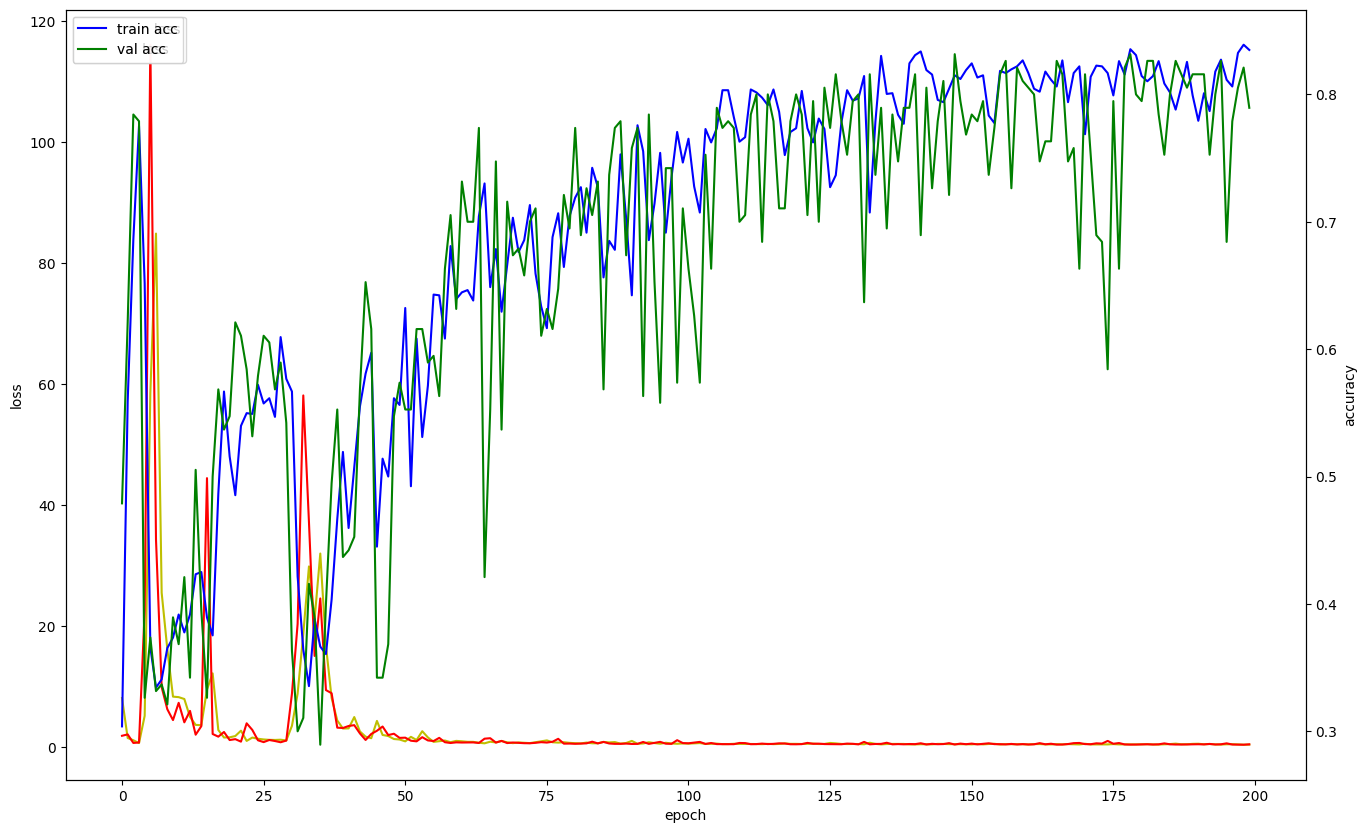

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [13]:
model.save('models/model.keras')

In [14]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


array([[[129,   1],
        [ 16,  44]],

       [[102,  22],
        [ 18,  48]],

       [[109,  17],
        [  6,  58]]])